## Branje podatkov

In [2]:
import pandas as pd
import os.path
import math

Preberemo podatke z intenzitetani izražanja genov, eksperimentalno pridobljenih z DNA mirkomrežami:

In [3]:
df = pd.read_csv(os.path.join('data','SALMON_DESeq2_normCounts.csv'), comment="#", sep="\t")

Kaj podatki vsebujejo?

In [4]:
print(df.columns)
df[['hgnc_symbol']]

# Get the number fo NaNs in th hgnc_symbol column
print(df['hgnc_symbol'].isna().sum())

# Get the percent fo NaNs in th hgnc_symbol column
print(df['hgnc_symbol'].isna().sum() / len(df['hgnc_symbol']))

Index(['ID', 'baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj',
       'hgnc_symbol', 'description', 'X1T_S6_UMI', 'X1N_S1_UMI', 'X2T_S7_UMI',
       'X2N_S2_UMI', 'X3T_S8_UMI', 'X3N_S3_UMI', 'X4T_S9_UMI', 'X4N_S4_UMI',
       'X5T_S10_UMI', 'X5N_S5_UMI', 'X7T_S15_UMI', 'X7N_S11_UMI',
       'X8T_S16_UMI', 'X8N_S12_UMI', 'X9TD_S18_UMI', 'X9N_S13_UMI',
       'X10T1_S19_UMI', 'X10N_S14_UMI'],
      dtype='object')
1791
0.1619056228530103


In [5]:
# Remove all rows where hgnc_symbol is NaN
df = df[~df['hgnc_symbol'].isna()]

Stolpci XnT_Sx_UMI vsebujejo normalizirane vrednosti kartiranih RNAseq odčitkov, vzorcev z WILS tumorjem ledvic.
Stolpci XnN_Sx_UMI vsebujejo normalizirane vrednosti kartiranih RNAseq odčitkov, normalnih vzorcev.

Vrednosti je potrebno skalirati in izračunati povprečne vrednosti.

Zanimata nas zgolj stolpca s povprečji skupaj z imeni genov, ki jih uporablja tudi GEM:

<Axes: >

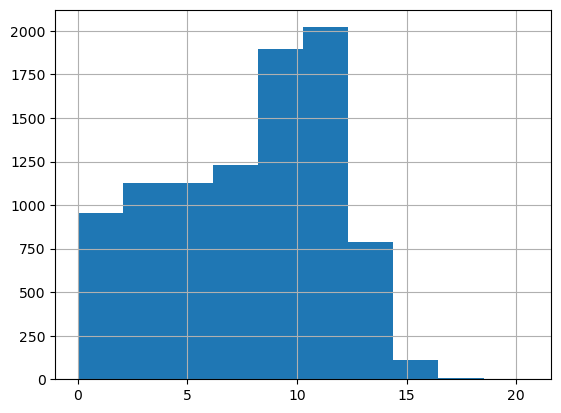

In [6]:
df_tumor = df[[
    'X1T_S6_UMI',
    'X2T_S7_UMI',
    'X3T_S8_UMI',
    'X4T_S9_UMI',
    'X5T_S10_UMI',
    'X7T_S15_UMI',
    'X8T_S16_UMI',
    'X9TD_S18_UMI',
    'X10T1_S19_UMI'
]]

# Sum +1 to all values
df_tumor = df_tumor.applymap(lambda x: x + 1)

# Log2 transform all tumor values  
df_tumor = df_tumor.applymap(lambda x: math.log2(x))

# Get average of tumor samples
df_tumor['value'] = df_tumor.mean(axis=1)

# Plot histogram of average
df_tumor['value'].hist()

<Axes: >

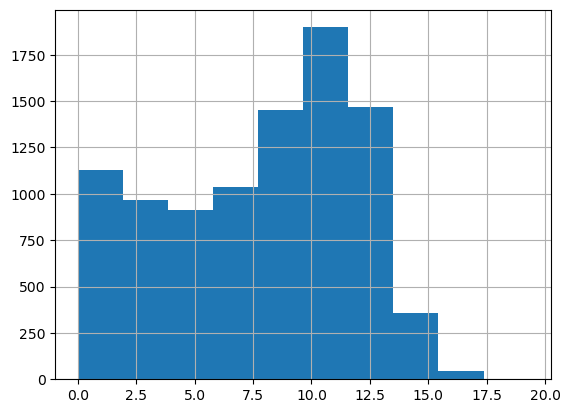

In [7]:
df_normal = df[[
    'X1N_S1_UMI',
    'X2N_S2_UMI',
    'X3N_S3_UMI',
    'X4N_S4_UMI',
    'X5N_S5_UMI',
    'X7N_S11_UMI',
    'X8N_S12_UMI',
    'X9N_S13_UMI',
    'X10N_S14_UMI'
    ]]

# Sum +1 to all values
df_normal = df_normal.applymap(lambda x: x + 1)

# Log2 transform all normal values  
df_normal = df_normal.applymap(lambda x: math.log2(x))

# Get average of normal samples
df_normal['value'] = df_normal.mean(axis=1)

# Plot histogram of average
df_normal['value'].hist()

Podatke si shranimo v ločeni datoteki:

In [8]:
# Create new dataframe for tumor, including gene symbol and average
df_tumor = pd.concat([df['ID'], df['hgnc_symbol'], df_tumor['value']], axis=1, keys=['ENS_ID', 'gene', 'value'])
df_tumor.to_csv(os.path.join('data','data_tumor.txt'), index=False)

# Create new dataframe for normal, including gene symbol and average
df_normal = pd.concat([df['ID'], df['hgnc_symbol'], df_normal['value']], axis=1, keys=['ENS_ID', 'gene', 'value'])
df_normal.to_csv(os.path.join('data','data_normal.txt'), index=False)